In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils

In [6]:
def average_outputs(folder, N_stat, N_threads):

    values          = [pd.read_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
    means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(50)

    means.to_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

def average_states(folder, N_stat, N_threads):

    values  = [pd.read_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
    
    means.to_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

average_outputs("radius_corr", 5 , 10)
average_states("radius_corr", 5 , 10)

In [7]:
time    = np.loadtxt("radius_corr/time.csv")[1:]*10**9
df_n    = pd.read_csv("../step_input/1I_1O/d1/Nx=7_Ny=7_Nz=1_Ne=2.csv")
df_y    = pd.read_csv("radius_corr/Nx=7_Ny=7_Nz=1_Ne=2.csv")
df_n_s  = pd.read_csv("../step_input/1I_1O/d1/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
df_y_s  = pd.read_csv("radius_corr/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


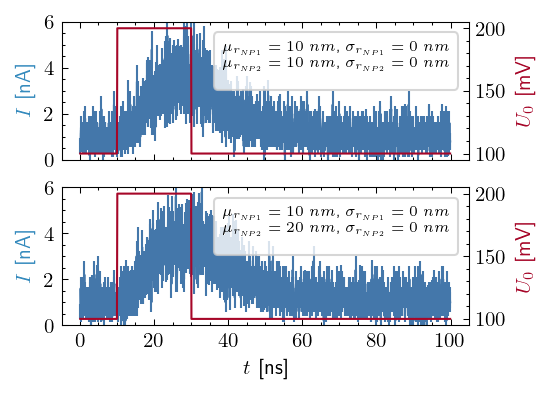

In [8]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    fig.set_figheight(fig.get_figheight())

    ax  = fig.add_subplot(2,1,1)
    ax2 = ax.twinx()
    ax2.plot(time, df_n['E0']*1000, c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(time, df_n['Current']/1000, df_n['Error']/1000, label='')
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,6)
    ax.set_xticklabels("")
    ax.legend(title="$\mu_{r_{NP1}} = 10$ $nm$, $\sigma_{r_{NP1}} = 0$ $nm$\n$\mu_{r_{NP2}} = 10$ $nm$, $\sigma_{r_{NP2}} = 0$ $nm$",
              title_fontsize='x-small', frameon=True)


    ax  = fig.add_subplot(2,1,2)
    ax2 = ax.twinx()
    ax2.plot(time, df_n['E0']*1000, c='#A60628')
    ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

    ax.errorbar(time, df_y['Current']/1000, df_y['Error']/1000)
    ax.set_ylabel("$I$ [nA]", c='#348ABD')
    ax.set_ylim(0,6)
    ax.legend(title="$\mu_{r_{NP1}} = 10$ $nm$, $\sigma_{r_{NP1}} = 0$ $nm$\n$\mu_{r_{NP2}} = 20$ $nm$, $\sigma_{r_{NP2}} = 0$ $nm$",
              title_fontsize='x-small', frameon=True)
    ax.set_xlabel("$t$ [ns]")

    fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
    fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

MovieWriter ffmpeg unavailable; using Pillow instead.


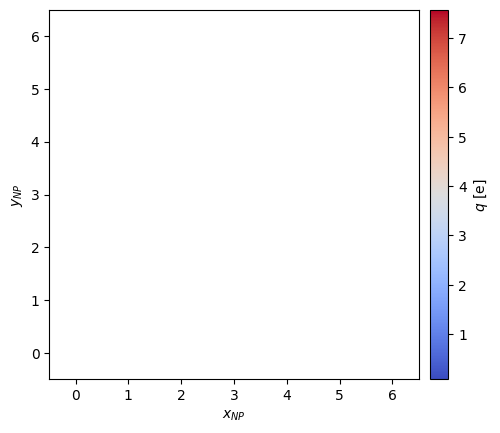

In [9]:
ani = nanonets_utils.animate_landscape("radius_corr/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", 7 , 7, delay_between_frames=50, interpolation='bilinear', cbar_label='$q$ [e]')
ani.save("plots/state_animation.gif")